In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Generate Some Data**

yt = 50 + 0.4 et-1 + 0.3et-2 + et

et = normal distribution with mean 0 and std. dev. 1 


In [ ]:
errors = np.random.normal(0, 1, 400)

In [ ]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [ ]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [ ]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

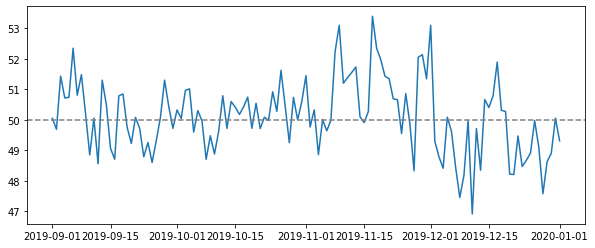

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [ ]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

**ACF**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<BarContainer object of 10 artists>

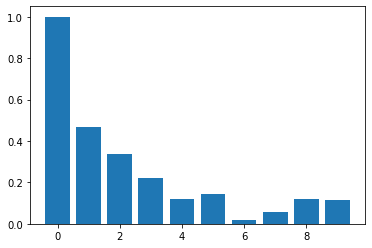

In [ ]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

**PACF**

<BarContainer object of 25 artists>

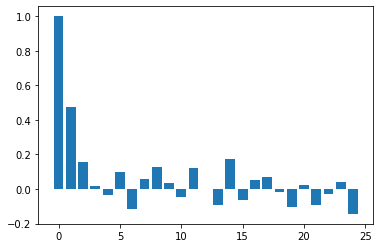

In [ ]:
pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

**GET TRAINING AND TESTING SET**

In [ ]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

**FIT ARIMA MODEL**

In [ ]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [ ]:
#fit the model
model_fit = model.fit()

In [ ]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -178.352
Method:                       css-mle   S.D. of innovations              1.055
Date:                Sun, 07 Nov 2021   AIC                            364.704
Time:                        17:05:32   BIC                            375.887
Sample:                    09-01-2019   HQIC                           369.245
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1160      0.158    318.132      0.000      49.807      50.425
ma.L1.y        0.3702      0.084      4.392      0.000       0.205       0.535
ma.L2.y        0.2791      0.095      2.953      0.0

**PREDICTED MODEL**

yt = 50+ 0.37 et-1 + 0.25 et-2

In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [ ]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [ ]:
residuals = test_data - predictions

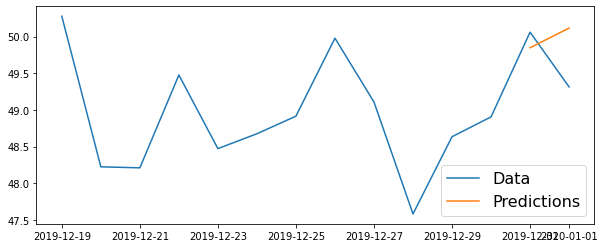

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0103


In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.5870374913183777
